In [2]:
# SIMPLE LINEAR REGRESSION

In [3]:
import pandas as pd# helps to read dataset from different sources
import numpy as np 
import matplotlib.pyplot as plt# for visualization

In [4]:
df=pd.read_csv('height-weight.csv')

In [5]:
df# this is our data set

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


# find how the independent and dependent are releated to each other

Text(0, 0.5, 'height')

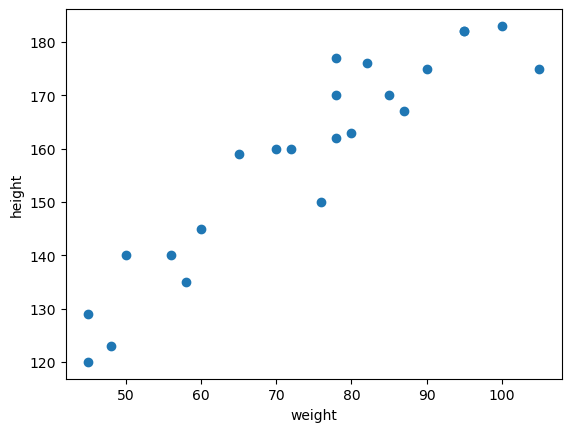

In [6]:
# scatter plot to find correlation

plt.scatter(df['Weight'],df['Height'])# these represent the truth points---> on a scattered plot
plt.xlabel("weight")# labeling the graph
plt.ylabel("height")
# weight incresing height incresing --->linear relationship

In [7]:
# corelation between dependent and independent features 
df.corr()#--->linear regression--->highly corealated

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


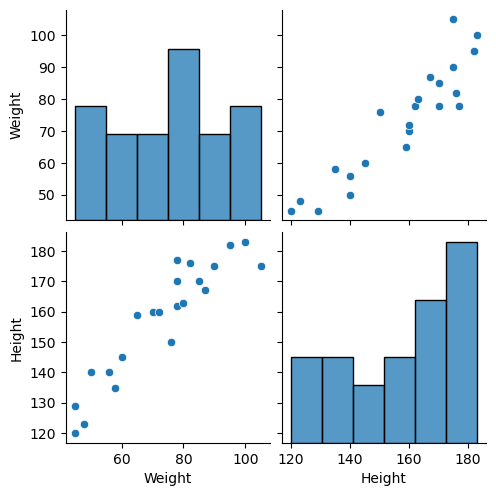

In [8]:
# seaborn for visualisation
import seaborn as sns
sns.pairplot(df)#--> how they are corelated

In [9]:
# indepent and dependent feature --->linearly correalted
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [10]:
X_seris=df['Weight']
X_seris.shape# using this series one inorder to understand the difference 

(23,)

In [11]:
X=df[['Weight']]# always must --->>>independednt feature should be always in data frame or 2d array
X.shape## weight is an independent feature

(23, 1)

In [12]:
y=df['Height']# output feature can be in series form or one d array
y## height is a dependent feature---> based upon the weight

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [13]:
## train and test split
from sklearn.model_selection import train_test_split
# this function is imported in order to spilt the dataset in test and train

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape

(17, 1)

In [16]:
# standardization 
# x claculated with KGs
# y claculated with cm

In [17]:
# we actually change the independent feature make it go through z score in order standardize it
# becuz the gradient decent applies on the independent feature that is the reason we require to standardize the independent 
# faeture

In [18]:
# normalize the data points

In [19]:
from sklearn.preprocessing import StandardScaler# this class is being imported 
# this class is used for noramizeation

In [20]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [21]:
sclear=StandardScaler()# mean would be 0 and standard dev= sigma sq.# object is created 
sclear.fit_transform(X_train) # methord function is being called

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [22]:
X_train=sclear.fit_transform(X_train)
# learn aabout fit_transform and transform
# data leakage and how it effects

In [23]:
X_test=sclear.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

# here model is being created 
-> feedin up with training data only

In [24]:
### apply simple linear regression
from sklearn.linear_model import LinearRegression# this class tries to find the best fit line
regression=LinearRegression(n_jobs=-1)# njobs means the model will use all the cpu core for computation
regression.fit(X_train,y_train)# this means that the model learn about then coefficeint about the x train 
# and y train data set

LinearRegression(n_jobs=-1)

In [25]:
# the best fit line is being formed---> by internal mechanism

In [26]:
print(regression.coef_)## this will provide us with slope # slope would be one because only one feature is there 

[17.2982057]


In [27]:
regression.intercept_

156.47058823529412

In [28]:
intercept=regression.intercept_
# the moment when your weight value is 0 .the height is value is this

plotting best fit line wrt to training data

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

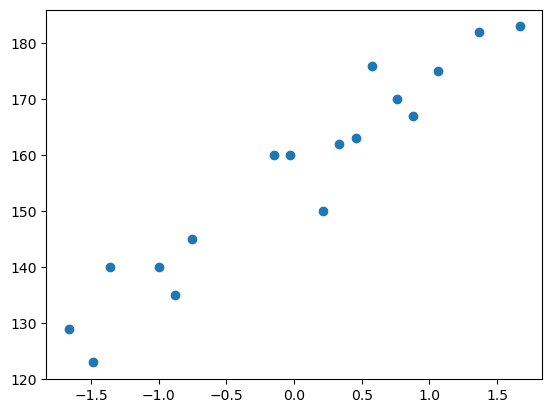

In [44]:
plt.scatter(X_train,y_train)# truth point related to x train and y train
plt.plot(X_train,regression.predict(X_train),cmap='r')# truth point related to x train and y train

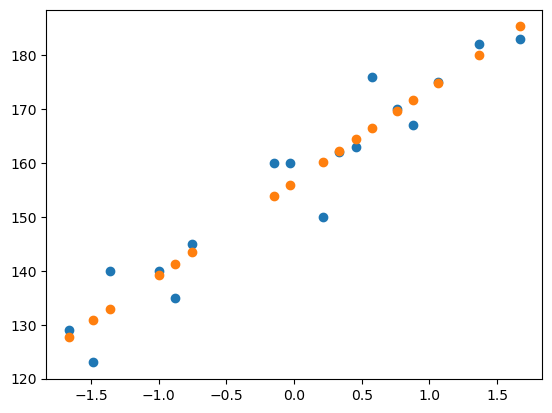

In [47]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)# this is my truth points
# model has already prepared a best fit line
# based on which we are predicting the values of xtrain
plt.scatter(X_train,regression.predict(X_train))# which would ofcourse be a linear

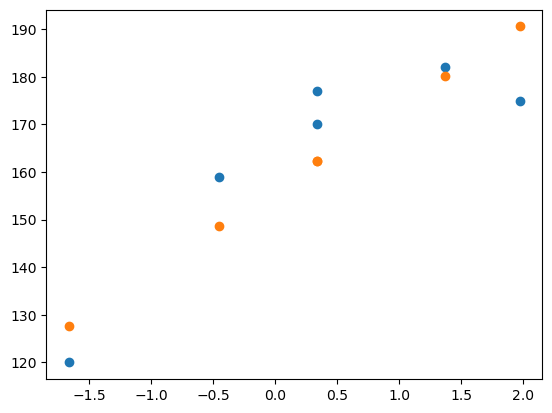

In [45]:
## plot Training data plot best fit line
plt.scatter(X_test,y_test)# truth testing points
plt.scatter(X_test,regression.predict(X_test))

In [31]:
# prediction for the test data
y_pred=regression.predict(X_test)## testing data will be predicted
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [32]:
# perfromance metric

# this represnts the differenece between the actaul and the predicted points
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)# Here, 9.66 means that, on average, your predictions are off by about 9.66 units from the actual values.

114.84069295228699
9.665125886795005


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)# 0.7360826717981276 that is 73 percent accuarcy

0.7360826717981276


In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
#0.6701033397476595 67% accuaray

0.6701033397476595

In [33]:
# ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [34]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [35]:
model.summary()

c:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 14 Sep 2025   Prob (F-statistic):                       0.664
Time:                        22:17:38   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# how to predict for new data
# we always need to normalise the data points before feeding it to the model for prediction
regression.predict(sclear.transform([[72]]))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])